<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Water Management Notebook 3: Water distribution systems

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In this notebook, we learn how to compute the pressure distribution and flow in a water distribution system. The pressure is commonly expresed in equivalent meters of water column (think of a water tower of that height). 
The pressure drop $\Delta p$ in a pipe, also in terms of equivalent meters of water column, may be computed with the Darcy-Weisbach equation

$\Delta p = 8fLQ^2 / (g\pi^2 D^5)$

where $f$ is the friction factor of the pipe, $L$ is the length of the pipe, $Q$ is the dischrage through the pipe, $g$ is the acceleration due to gravity, and $D$ is the diameter of the pipe. Consistent units need to be used (meters and seconds, for example).

###Exercise 1 <a name="back1"></a> Pressure drop in a pipe. 
Write a Python function that returns the pressure drop in a pipe. Input arguments are $f$, $L$, $Q$, and $D$. All input arguments need to be keyword arguments. The discharge needs to be in m$^3$/s. Output is the pressure drop in meters of water column. The function needs to be called `pdrop`. Test your function for a discharge $Q=200$ m$^3$/hour through a pipe with length $L=1000$ m, diameter $D=300$ mm, and friction factor $f=0.02$. Compute by hand what the value should be, then check whether your Python function gives the same value.

<a href="#ex1answer">Answers to Exercise 1</a>

A water distribution system consists of multiple pipes that are connected in nodes. Consider a simple system consisting of two pipes. Pipe 1 starts in node $A$ and ends in node $B$ where it is connected to pipe 2. Pipe 2 starts at node $B$ and ends at node $C$. The pressure distribution along the two pipes is shown below. Water enters the system at node $A$, where the pressure is fixed to $p_A=40$ m (for example with a pump or water tower). The friction factor of both pipes is $f=0.02$; the lengths are $L_1=1000$ m, $L_2=2000$ m; the diameters are $D_1=380$ mm, $D_2=300$ mm. The outflow at node $C$ is $Q_C=200$ m$^3$/hour, while there is an additional $Q_B=100$ m$^3$/hour taken out at node B. From continuity of flow, this means that $Q_1=300$ m$^3$/hour and $Q_2=200$ m$^3$/hour. We are going to compute the pressure at nodes $B$ and $C$ and plot the pressure in nodes $A$, $B$, and $C$. We will store all variables in arrays and compute the pressure using a loop. This may look like overkill for a system with 2 pipes, but is necessary when there are many pipe segments. Inside the loop we will call the function `pdrop`. The code below will only work if your `pdrop` function is written according to the specifications in Exercise 1.

[40.         38.55165923 34.35377999]


Text(0, 0.5, 'Pressure (m)')

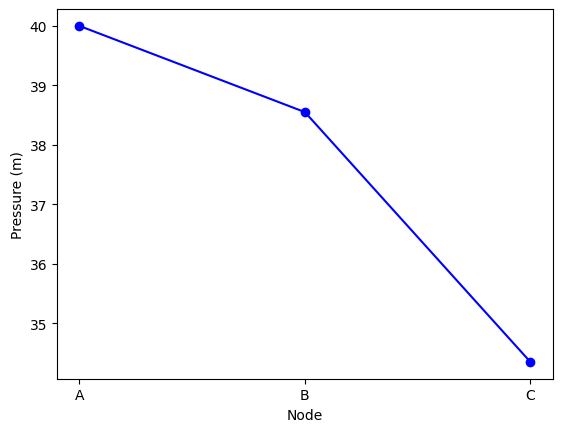

In [2]:
# Function repeated here else Notebook doesn't run
def pdrop(f=1,L=1,Q=1,D=1):
    delp = 8.0 * f * L * Q**2 / (9.81 * np.pi**2 * D**5)
    return delp

f = 0.02 * np.ones(2)
L = np.array([1000.0, 2000.0])
D = np.array([0.38, 0.3])
Q = np.array([300.0, 200.0]) / 3600.0 # To convert hours to seconds
p = np.zeros(3)
p[0] = 40 # This is point A
for i in range(2):
    p[i+1] = p[i] - pdrop( f = f[i], L = L[i], Q = Q[i], D = D[i] )
print(p)
plt.plot(p,'-bo')
plt.xticks(np.arange(3),['A','B','C'])
plt.xlabel('Node')
plt.ylabel('Pressure (m)')

###Exercise 2 <a name="back2"></a> A series of pipes
Consider a simple water distribution system consisting of 11 nodes and 10 pipes. The system starts at node $A$ and ends at node $K$. The pipes are numbered 0 through 9. All pipes are connected one after the other (so pipe 0 goes from node $A$ to $B$, pipe 1 from $B$ to $C$, etc., and pipe 9 goes from node $J$ to node $K$). Each pipe is 1000 m long and has a friction coefficient of 0.02. The diameter of pipes 0-4 is 380 mm, and the diameter of pipes 5-9 is 300 mm.  Water enters the system at node $A$ where the pressure is fixed to 40 m. 50 m$^3$/hour is taken from all nodes except node $A$. 

You are asked to write code to determine the pressure in each node. Create arrays of length 10 for the friction factor $f$, pipe length $L$, diameter $D$, and discharge in the pipe $Q$. Compute the discharge in each pipe form continuity (i.e., starting at the end, the discharge in pipe 9 should be equal to the discharge taken out at node $K$; the discharge in pipe 8 should equal the discharge taken out at node $J$ plus the discharge in pipe 9, etc.). Compute the pressure in each node with a `for` loop. The pressure in node $i+1$ is equal to the pressure in node $i$ minus the pressure drop over the pipe between nodes $i$ and $i+1$. Use the function you wrote for Exercise 1. Plot the pressure (on the vertical axis) for each node (on the horizontal axis) from $A$ though $K$. Label the nodes $A$ through $K$ with the `xticks` command and label the axes. When you do things correctly, the pressure in node $K$ should be around 19.5 m.

<a href="#ex2answer">Answers to Exercise 2</a>

###Loops in a water distribution system
Water distribution systems rarely consist simply of a set of pipes that are connected head to tail. Consider, for example, the system shown below. Water enters the system at node $A$ where the pressure is fixed. 400 m$^3$/hour is used at node $C$. Water can flow from node $A$ through pipes 0 and 1 to node $C$, but also through pipe 2. Obviously, there can only be one pressure in node $C$, so the total pressure drop over pipes 0 and 1 needs to be equal to the total pressure drop over pipe 2:

$\Delta p_0 + \Delta p_1 = \Delta p_2$

The system will do this automatically by distributing the flow such that the pressure drop along the two routes is equal. Another way of stating this is that the total pressure drop over the loop starting at point $A$, going through pipe 0, 1, and then back through pipe 2 should equal zero:

$\Delta p_0 + \Delta p_1 - \Delta p_2$ = 0

<img src= "http://i.imgur.com/yvDfKmu.png" width="400px">

A common approach to determine the flow and pressure distribution in a system with loops is the method developed by Hardy Cross. The method consists of 3 steps. First, make a guess at the water distribution in the system. Make sure that your guess meets continuity of flow. For example, for the case above, you could guess $Q_0=300$, $Q_1=300$, and $Q_2=100$ (note which direction is chosen positive in the figure below). This guess meets continuity of flow, as $Q_0=Q_1$ (no water is taken out at node $B$), and $Q_1+Q_2=400$ ($400$ is taken out at node $C$). This guess is unlikely to produce the correct pressure drop: the pressure drop over the loop is likely not zero. In the second step of the approach, the discharges in the pipes are adjusted such that the pressure drop over the loop is zero while maintaining continuity of flow. This is done by adding a circular discharge $\Delta Q$ to the system, as indicated in the figure below. Note that the direction of $\Delta Q$ is chosen counter clock-wise. $\Delta Q$ needs to be added to $Q_0$ and $Q_1$ (as it is positive in the same direction as $Q_0$ and $Q_1$, while it should be subtracted from $Q_2$ (as it is positive in the direction opposite to $Q_2$). For example, when $\Delta Q = 50$, then $Q_0=350$, $Q_1=350$, and $Q_2=50$. Note that whatever the value of $\Delta Q$, continuity is always met!

<img src= "http://i.imgur.com/NJK8o5I.png" width="400px">

Let's now solve the flow and pressure distribution in the loop shown above. First, we need to write a function that computes the pressure drop for the loop 0-1-2. The function needs to take $\Delta Q$ as its first argument, and needs to be passed values for $Q_0$, $Q_1$, and $Q_2$. All discharges need to be entered in m$^3$/s. The other variables ($f$, $L$, and $D$) are specified inside the function (it is called that they are *hard coded*, as they cannot be changed). The function needs to return the total pressure drop over the loop. Given: $f=0.02$ for all pipes; $L_1=1600$ m, $L_2=1200$ m, $L_3=2000$ m; $D=300$ mm for all pipes. Here is the function. Note that we use the `pdrop` function that was developed for Exercise 1.

In [3]:
def pdrop_triangle(delQ,Q0,Q1,Q2):
    f = 0.02 * np.ones(3)
    L = np.array([1600.0,1200.0,2000.0])
    D = 0.3*np.ones(3)
    Q = np.array([Q0+delQ,Q1+delQ,Q2-delQ])  # Discharges are adjusted according to delQ
    delp = np.zeros(3)
    for i in range(3):
        delp[i] = pdrop(f=f[i],L=L[i],D=D[i],Q=Q[i])
    pressure_drop = delp[0] + delp[1] - delp[2]
    return pressure_drop  # Pressure drop over the loop

Now that we have a function that computes the drop over the loop, we need to find the value of `delQ` that makes the pressure drop over the loop zero. We could try to use the `fsolve` function to do that. The function fsolve is not magic, however. First of all, it doesn't guarantee to find a zero. Second, if the function has multiple points where the function equals zero, then the value that `fsolve` finds depends on the starting location. The function `pdrop_triangle` has two zeros, as you can see by plotting $\Delta p$ vs. $\Delta Q$. To avoid finding the wrong zero, we use a different function to find the zero of `pdrop_triangle`. The function is called `bisect` and implements what is called the *Bisection* method. It requires the specification of two values (called `a` and `b`) of $\Delta Q$ between which to search for a zero. In addition, for one of the search limits the `pdrop_triangle` function needs to be negative, while for the other value the `pdrop_triangle` needs to be positive. When looking at the values above, good limits seem to be `a=Q2`, in which case the flow in pipe 2 is zero and `b=-Q0`, in which case the flow in pipe 0 is zero. Use `help` to read more information on the `bisect` method.  

In [4]:
from scipy.optimize import bisect
Q0,Q1,Q2 = 300.0/3600.0, 300.0/3600.0, 100.0/3600.0  # Q values need to be in m3/s
delQ = bisect( pdrop_triangle, a=Q2, b=-Q0, args=(Q0,Q1,Q2) )
print(delQ)

-0.032440012050857246


Let's verify that the computed value of `delQ` indeed gives zero pressure drop over the loop

In [5]:
print('pressure drop over triangle:',pdrop_triangle(delQ, Q0, Q1, Q2))
print('The discharge delQ is',delQ*3600,'m3/h')

pressure drop over triangle: -2.9894309250266815e-10
The discharge delQ is -116.78404338308609 m3/h


The computed discharge $\Delta Q$ results in zero pressure drop over the loop, but what we really want are the discharges in the pipes and the pressure drops over the pipes. We can write an entirely new function for that, but that would be a lot of extra work, and a new source for bugs. We can also modify our existing pdrop_triangle function. Let's add a keyword argument `full_output`. When `full_output` is set to `True`, the function doesn't just return the total pressure drop over the loop, but it also returns an array with the discharges in the pipes and an array with the pressure drops in the pipes. The default value of `full_output` is `False`, so that the function `pdrop_triangle` can be used in `bisect` without modification.

In [6]:
def pdrop_triangle(delQ,Q0,Q1,Q2,full_output=False):
    f = 0.02 * np.ones(3)
    L = np.array([1600.0,1200.0,2000.0])
    D = 0.3 * np.ones(3)
    Q = np.array([Q0+delQ,Q1+delQ,Q2-delQ])  # Discharges are adjusted according to delQ
    delp = np.zeros(3)
    for i in range(3):
        delp[i] = pdrop(f=f[i],L=L[i],D=D[i],Q=Q[i])
    pressure_drop = delp[0] + delp[1] - delp[2]
    if full_output:
        return pressure_drop, Q, delp
    return pressure_drop  # Pressure drop over the loop
delQ = bisect( pdrop_triangle, Q2, -Q0, args=(Q0,Q1,Q2) )
pd, Q, delp = pdrop_triangle(delQ,Q0,Q1,Q2,True)
print('pressure drop over loop: ',pd)
print('discharges in pipes: ',Q * 3600) # To convert back to m3/hour)
print('pressure drops over pipes: ',delp)
print('pC through pipes 0-1: ',40.0 - delp[0] - delp[1])
print('pC through pipe 2: ',40.0 - delp[2])

pressure drop over loop:  -2.9894309250266815e-10
discharges in pipes:  [183.21595662 183.21595662 216.78404338]
pressure drops over pipes:  [2.81829549 2.11372162 4.93201712]
pC through pipes 0-1:  35.067982884219454
pC through pipe 2:  35.067982883920514


###Exercise 3. <a name="back3"></a> A rectangular pipe network
Consider flow through the following pipe system. Water enters at node $A$ where the pressure is maintained at 40 m. 200 m$^3$/hour is used at node B, and 300 m$^3$/hour is used at node C. Pipes 0 and 2 are 1600 m long, while pipes 1 and 3 are 1200 m long. $f=0.02$ and $D=300$ mm for all pipes. Use the method of Hardy Cross to compute the discharges in all pipes (in m$^3$/hour) and compute the pressure drops in all pipes. Finally, compute the pressure in node C. 

<img src= "http://i.imgur.com/SpdQlKJ.png" width="400px">

<a href="#ex3answer">Answers to Exercise 3</a>

###Exercise 4. <a name="back4"></a> A water distribution system with two loops
An additional pipe is installed in the distribution system of Exercise 3, as shown in the figure below. Pipe 4 runs from node A to node C and is 2000 m long. The other properties are the same as for the other pipes. Water can now flow from Node A to Node C in three different ways. This redundancy is a good feature of a water distribution system, but it also makes it more complicated to compute the discharge in each pipe and the pressure in each node. To find a solution, we need to iterate between the two loops: solve for $\Delta Q_1$ and adjust discharge estimates $Q_0$, $Q_1$, and $Q_4$ accordingly, solve for $\Delta Q_2$ and adjust discharge estimates $Q_2$, $Q_3$, and $Q_4$ accoringly, then back to solve for $\Delta Q_1$ and adjust discharge estimates $Q_0$, $Q_1$, and $Q_4$ accordingly, etc., until the solution converges. The solution has converged when the values of $\Delta Q_1$ and $\Delta Q_2$ approach zero, which means that the discharges in the pipes don't change anymore from iteration to iteration. We will solve for the discharges and pressure distribution in the system shown below in three steps.

<img src= "http://i.imgur.com/SwXmlBi.png" width="400px">

*Step 1* Write a function that computes the pressure drop in loop 1. The function should take $\Delta Q_1$ as its first input argument, followed by $Q_0$, $Q_1$, and $Q_4$. It should return the pressure drop over the loop. Test your function by computing the value of $\Delta Q_1$ such that the pressure drop over the loop is zero, using $Q_0=300.0/3600$, $Q_1=100.0/3600$, and $Q_4=100.0/3600$, using the `bisect` method. The correct answer is -0.02471 (-88.96 m$^3$/hour).

*Step 2* Write a function that computes the pressure drop in loop 2. The function should take $\Delta Q_2$ as its first input argument, followed by $Q_2$, $Q_3$, and $Q_4$. It should return the pressure drop over the loop. Test your function by computing the value of $\Delta Q_2$ such that the pressure drop over the loop is zero, using $Q_2=Q_3=Q_4=100.0/3600$, using the `bisect` method. The correct answer is 0.00233 (8.392 m$^3$/hour).

*Step 3*. 
The final step is to iterate between the two loops to obtain a solution. The process is as follows:

1. Make an initial estimate for `Q0`, `Q1`, `Q2`, `Q3`, and `Q4`.   
2. Solve for $\Delta Q_1$ and adjust `Q0`, `Q1`, `Q4`.
3. Solve for $\Delta Q_2$ and adjust `Q2`, `Q3`, `Q4`.
4. Repeat steps 2 and 3 until convergence.

It is recommended to place steps 2 and 3 in a loop. Start with doing the loop only a few times, and print the values of `Q0`, `Q1`, `Q2`, `Q3`, `Q4` to the screen every time you cycle through the loop so you can see whether the updates make sense and wether the process converges. When the loop seems to work nicely and seems to approach convergence, you can increase the number of times you do the loop (if you do it correctly and your initial guess isn't too far off, you will converge in only 5 or 6 iterations). 

Report the discharges in all pipes (in m$^3$/hour) and the pressure in node C. Does addition of the pipe from $A$ to $C$ have a big influence on the pressure in Node C?

<a href="#ex4answer">Answers to Exercise 4</a>

###Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

In [7]:
def pdrop(f=1,L=1,Q=1,D=1):
    delh = 8.0 * f * L * Q**2 / (9.81 * np.pi**2 * D**5)
    return delh
pdrop(f=0.02, L=1000, Q=200.0/60.0/60.0, D=0.3)

2.098939623042301

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

Text(0.5, 0, 'Node')

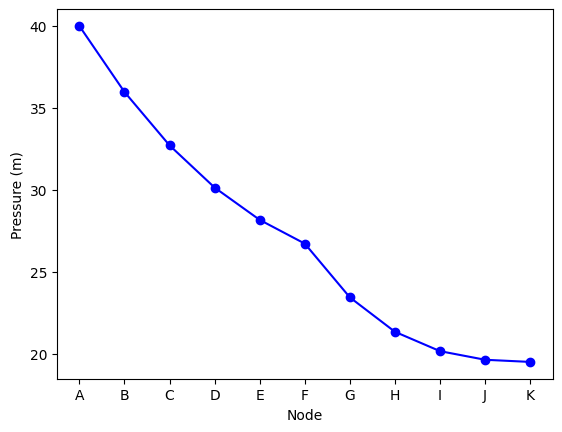

In [8]:
f = 0.02 * np.ones(10)
L = 1000 * np.ones(10)
D = np.ones(10)
D[:5] = 0.38
D[5:] = 0.3
Q = np.arange(500,0,-50) / 3600.0
p = np.zeros(11)
p[0] = 40 # This is point A
for i in range(10):
    p[i+1] = p[i] - pdrop( f = f[i], L = L[i], Q = Q[i], D = D[i] )
plt.plot(p,'-bo')
plt.xticks(np.arange(11),['A','B','C','D','E','F','G','H','I','J','K'])
plt.ylabel('Pressure (m)')
plt.xlabel('Node')

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [9]:
def pdrop_rect(delQ,Q0,Q1,Q2,Q3,full_output=False):
    f = 0.02 * np.ones(4)
    L = np.array([1600.0,1200.0,1600.0,1200.0])
    D = 0.3 * np.ones(4)
    Q = np.array([Q0+delQ,Q1+delQ,Q2-delQ,Q3-delQ])  # Discharges are adjusted according to delQ
    delp = np.zeros(4)
    for i in range(4):
        delp[i] = pdrop(f=f[i],L=L[i],D=D[i],Q=Q[i])
    pressure_drop = delp[0] + delp[1] - delp[2] - delp[3]
    if full_output:
        return pressure_drop, Q, delp
    return pressure_drop  # Pressure drop over the loop
Q0,Q1,Q2,Q3 = 300.0/3600, 100.0/3600, 200.0/3600, 200.0/3600
delQ = bisect( pdrop_rect, -Q0, Q3, args=(Q0,Q1,Q2,Q3) )
pd, Q, delp = pdrop_rect(delQ,Q0,Q1,Q2,Q3,True)
print('pressure drop over loop: ',pd)
print('discharges in pipes: ',Q * 3600)# To convert back to m3/hour)
print('pressure drops over pipes: ',delp)
print('pressure in C through pipes 0-1: ',40.0 - delp[0] - delp[1])
print('pressure in C through pipes 2-3: ',40.0 - delp[2] - delp[3])

pressure drop over loop:  -3.451394725573209e-10
discharges in pipes:  [281.03448276  81.03448276 218.96551724 218.96551724]
pressure drops over pipes:  [6.631002   0.41348611 4.02542178 3.01906634]
pressure in C through pipes 0-1:  32.95551188302999
pressure in C through pipes 2-3:  32.95551188268485


<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

In [10]:
def pdrop_loop1(delQ,Q0,Q1,Q4,full_output=False):
    f = 0.02 * np.ones(3)
    L = np.array([1600.0,1200.0,2000.0])
    D = 0.3 * np.ones(3)
    Q = np.array([Q0+delQ,Q1+delQ,Q4-delQ])  # Discharges are adjusted according to delQ
    delp = np.zeros(3)
    for i in range(3):
        delp[i] = pdrop(f=f[i],L=L[i],D=D[i],Q=Q[i])
    pressure_drop = delp[0] + delp[1] - delp[2]
    if full_output:
        return pressure_drop, Q, delp
    return pressure_drop  # Pressure drop over the loop
Q0,Q1,Q4 = 300.0 / 3600, 100.0 / 3600, 100.0 / 3600
delQ1 = bisect( pdrop_loop1, -Q0, Q4, args=(Q0,Q1,Q4) )
print('delQ1: ',delQ1,delQ1*3600)

delQ1:  -0.024710178357458465 -88.95664208685048


In [11]:
def pdrop_loop2(delQ,Q2,Q3,Q4,full_output=False):
    f = 0.02 * np.ones(3)
    L = np.array([1200.0,1600.0,2000.0])
    D = 0.3 * np.ones(3)
    Q = np.array([Q2-delQ,Q3-delQ,Q4+delQ])  # Discharges are adjusted according to delQ
    delp = np.zeros(3)
    for i in range(3):
        delp[i] = pdrop(f=f[i],L=L[i],D=D[i],Q=Q[i])
    pressure_drop = -delp[0] - delp[1] + delp[2]
    if full_output:
        return pressure_drop, Q, delp
    return pressure_drop  # Pressure drop over the loop

Q2,Q3,Q4 = 100.0 / 3600, 100.0 / 3600, 100.0 / 3600
delQ2 = bisect( pdrop_loop2, -Q4, Q3, args=(Q2,Q3,Q4) )
print(delQ2, delQ2*3600)

0.002331117137348176 8.392021694453433


In [12]:
Q0 = 300.0 / 3600
Q1 = 100.0 / 3600
Q2 = 100.0 / 3600
Q3 = 100.0 / 3600
Q4 = 100.0 / 3600

for i in range(10):
    delQ1 = bisect( pdrop_loop1, -Q0, Q4, args=(Q0,Q1,Q4) )
    Q0 = Q0 + delQ1
    Q1 = Q1 + delQ1
    Q4 = Q4 - delQ1
    delQ2 = bisect( pdrop_loop2, -Q4, Q3, args=(Q2,Q3,Q4) )
    Q2 = Q2 - delQ2
    Q3 = Q3 - delQ2
    Q4 = Q4 + delQ2
    print(np.array([Q0,Q1,Q2,Q3,Q4])*3600)

delQ1, Q, delp = pdrop_loop1(delQ1,Q0,Q1,Q4,True)
pC = 40 - delp[2]
print('Discharges in the pipes Q0,Q1,Q2,Q3,Q4:',Q0*3600,Q1*3600,Q2*3600,Q3*3600,Q4*3600)
print('Pressure in point C: ',pC)

[211.04335791  11.04335791 132.353669   132.353669   156.60297308]
[194.03481636  -5.96518364 140.14425953 140.14425953 165.82092411]
[189.8590569  -10.1409431  142.05692394 142.05692394 168.08401916]
[188.82833485 -11.17166515 142.52903576 142.52903576 168.64262939]
[188.57356801 -11.42643199 142.64572913 142.64572913 168.78070286]
[188.51057498 -11.48942502 142.67458245 142.67458245 168.81484256]
[188.49499817 -11.50500183 142.68171725 142.68171725 168.82328458]
[188.49114628 -11.50885372 142.68348157 142.68348157 168.82537215]
[188.49019376 -11.50980624 142.68391786 142.68391786 168.82588838]
[188.48995822 -11.51004178 142.68402575 142.68402575 168.82601603]
Discharges in the pipes Q0,Q1,Q2,Q3,Q4: 188.48995822009073 -11.510041779909269 142.68402575120223 142.68402575120223 168.82601602870702
Pressure in point C:  37.00876932134647


<a href="#back4">Back to Exercise 4</a>